In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
comment = pd.read_csv("/content/dataset.csv")
comment2 = pd.read_csv("/content/dataset2.csv")

In [5]:
comment2.head()

,Author,Content,Depth,SubCommentsCount,CommentAt
0,কিউটের ডিব্বা,Envato price koto,0.0,1.0,11/22/2024 03:43:03 PM
1,Md Aminul Khan,Elevenlabs ache ki,0.0,1.0,12/13/2024 12:54:41 PM
2,Hmd Kabirul Islam,Pictory subscription Hobe?,0.0,1.0,12/13/2024 08:51:47 PM
3,Dilip Sarkar,Ahref ache?,0.0,1.0,12/13/2024 11:07:52 PM
4,Md Yunus Ali,ভালো,0.0,1.0,12/14/2024 08:34:23 PM


In [6]:
if 'Depth' in comment2.columns:
  comment2 = comment2.drop('Depth', axis=1)

comment2.head()

,Author,Content,SubCommentsCount,CommentAt
0,কিউটের ডিব্বা,Envato price koto,1.0,11/22/2024 03:43:03 PM
1,Md Aminul Khan,Elevenlabs ache ki,1.0,12/13/2024 12:54:41 PM
2,Hmd Kabirul Islam,Pictory subscription Hobe?,1.0,12/13/2024 08:51:47 PM
3,Dilip Sarkar,Ahref ache?,1.0,12/13/2024 11:07:52 PM
4,Md Yunus Ali,ভালো,1.0,12/14/2024 08:34:23 PM


In [7]:
if 'ReactionsCount' in comment.columns:
  comment = comment.drop('ReactionsCount', axis=1)

comment.head()

,Author,Content,SubCommentsCount,CommentAt
0,Md Minhajul Islam,কত,1.0,06/05/2024 02:52:02 PM
1,Kazi Siratul Mostakim,Brilliant learning app share price?,0.0,06/06/2024 07:39:45 PM
2,Nehal Anas,Lightroom premium price?,1.0,06/09/2024 06:40:53 PM
3,Rahmot Hossain Niaz,vi envato elements price koto?,1.0,06/10/2024 09:53:42 AM
4,Rehdoy Hasan,wellsaid labs Ai Voice lab,2.0,06/10/2024 10:03:43 AM


In [8]:
comment_data = pd.concat([comment, comment2], ignore_index=True)
comment_data.head()

,Author,Content,SubCommentsCount,CommentAt
0,Md Minhajul Islam,কত,1.0,06/05/2024 02:52:02 PM
1,Kazi Siratul Mostakim,Brilliant learning app share price?,0.0,06/06/2024 07:39:45 PM
2,Nehal Anas,Lightroom premium price?,1.0,06/09/2024 06:40:53 PM
3,Rahmot Hossain Niaz,vi envato elements price koto?,1.0,06/10/2024 09:53:42 AM
4,Rehdoy Hasan,wellsaid labs Ai Voice lab,2.0,06/10/2024 10:03:43 AM


In [9]:
comment_data.shape

(17320, 4)

In [10]:
comment_data.duplicated().sum()

12945

In [11]:
comment_data.drop_duplicates(inplace=True)

In [12]:
comment_data.shape

(4375, 4)

In [13]:
comment_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4375 entries, 0 to 9632
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Author            4374 non-null   object 
 1   Content           4374 non-null   object 
 2   SubCommentsCount  4374 non-null   float64
 3   CommentAt         4374 non-null   object 
dtypes: float64(1), object(3)
memory usage: 170.9+ KB


In [14]:
comment_data.to_csv('research.csv', index=False)

<ipython-input-15-740aabea0fb2>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CommentAt'] = pd.to_datetime(data['CommentAt'], errors='coerce') # Convert to datetime


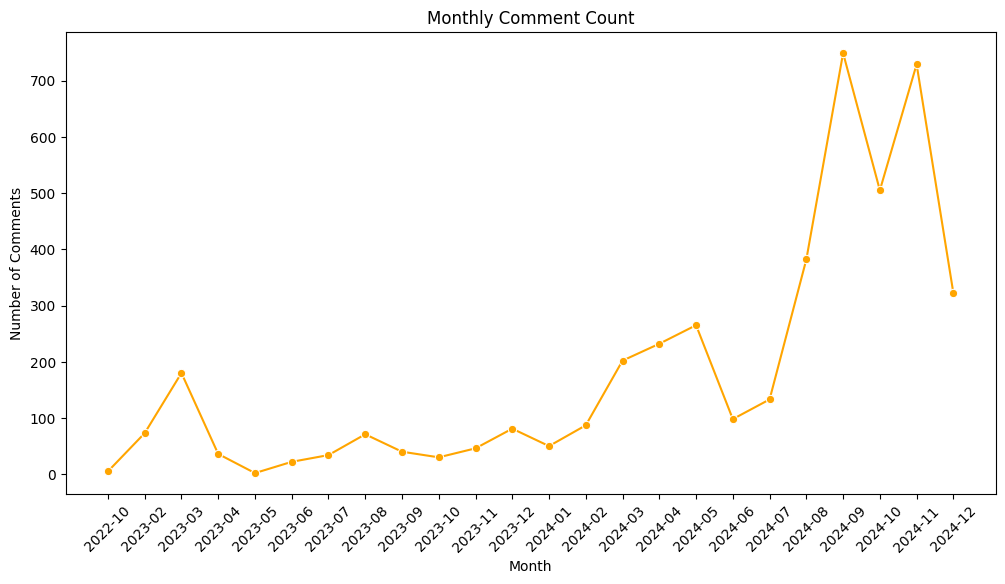

In [15]:
# Monthly comment counts
data= comment_data
data['CommentAt'] = pd.to_datetime(data['CommentAt'], errors='coerce') # Convert to datetime
monthly_comments = data['CommentAt'].dt.to_period("M").value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_comments.index.astype(str), y=monthly_comments.values, marker='o', color='orange')
plt.title('Monthly Comment Count')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

<ipython-input-16-e83ee0837879>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="mako")


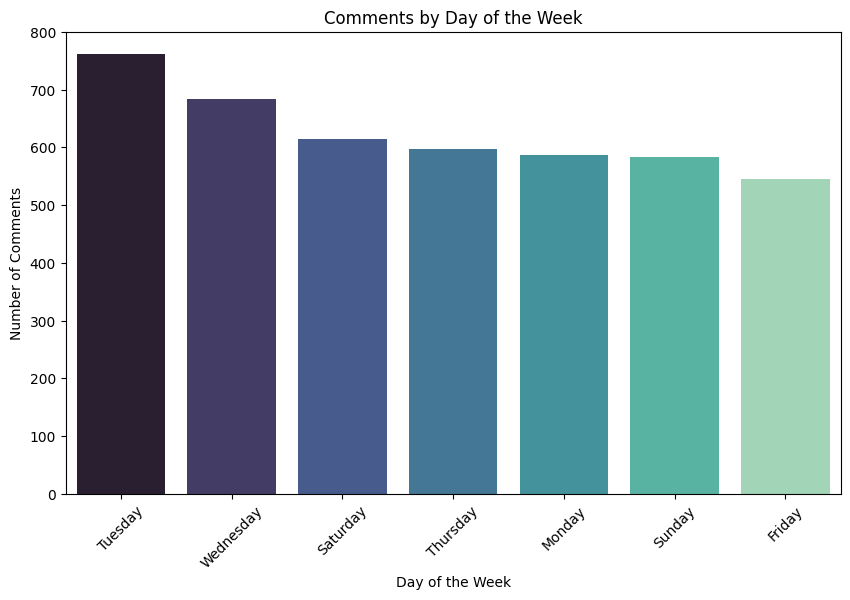

In [16]:
# Day of the week analysis
data['DayOfWeek'] = data['CommentAt'].dt.day_name()
day_counts = data['DayOfWeek'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="mako")
plt.title('Comments by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()


<ipython-input-17-a83528e3322f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="coolwarm")


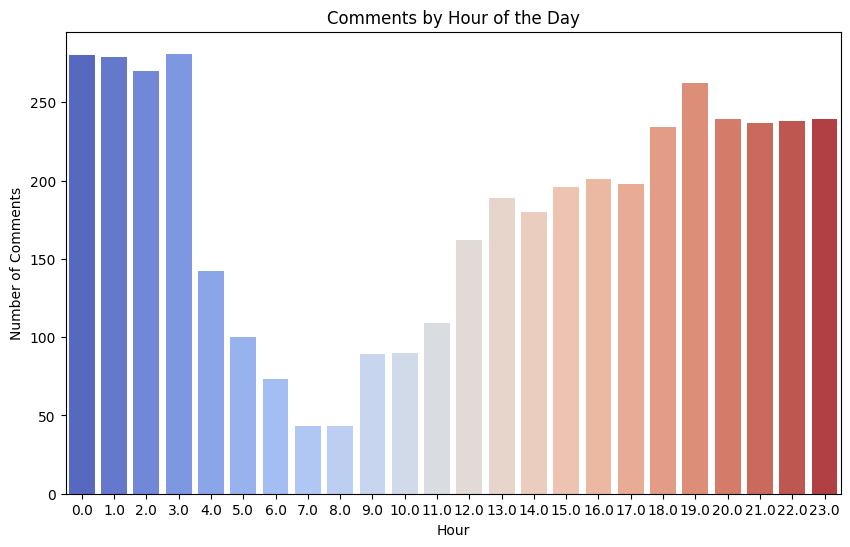

In [17]:
# Hourly comment counts
data['Hour'] = data['CommentAt'].dt.hour
hour_counts = data['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="coolwarm")
plt.title('Comments by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Comments')
plt.xticks(range(0, 24))
plt.show()


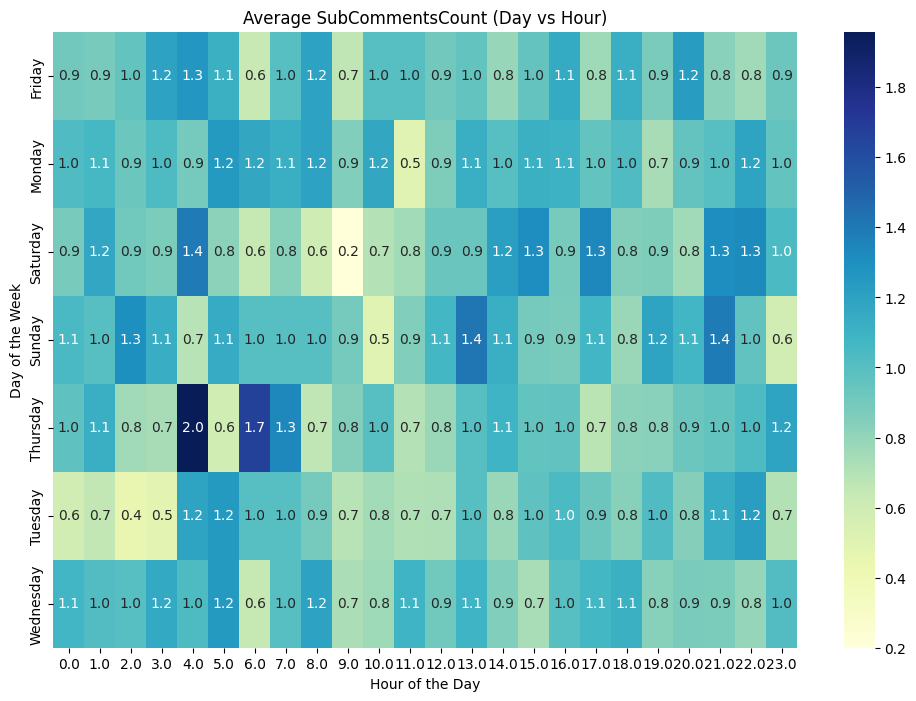

In [18]:
# Average SubCommentsCount by day and hour
hour_day_data = data.pivot_table(index=data['CommentAt'].dt.day_name(),
                                 columns=data['CommentAt'].dt.hour,
                                 values='SubCommentsCount', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(hour_day_data, cmap="YlGnBu", annot=True, fmt=".1f", cbar=True)
plt.title('Average SubCommentsCount (Day vs Hour)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


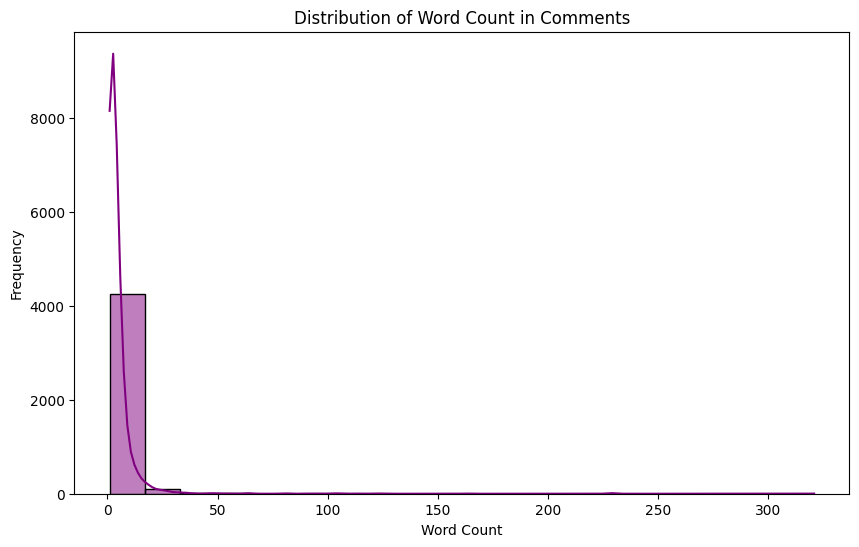

In [19]:
# Word count histogram
data['WordCount'] = data['Content'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(data['WordCount'], kde=True, bins=20, color="purple")
plt.title('Distribution of Word Count in Comments')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

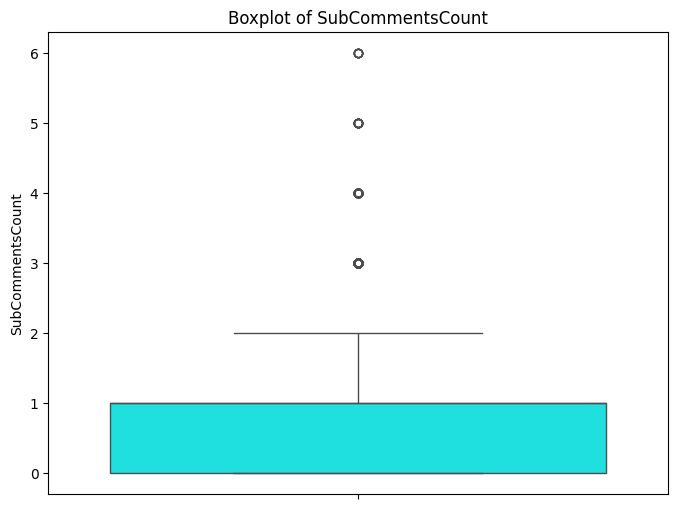

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['SubCommentsCount'], color="cyan")
plt.title('Boxplot of SubCommentsCount')
plt.ylabel('SubCommentsCount')
plt.show()

<ipython-input-21-f4509bea1ca1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words, palette="pastel")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2468 (\N{BENGALI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


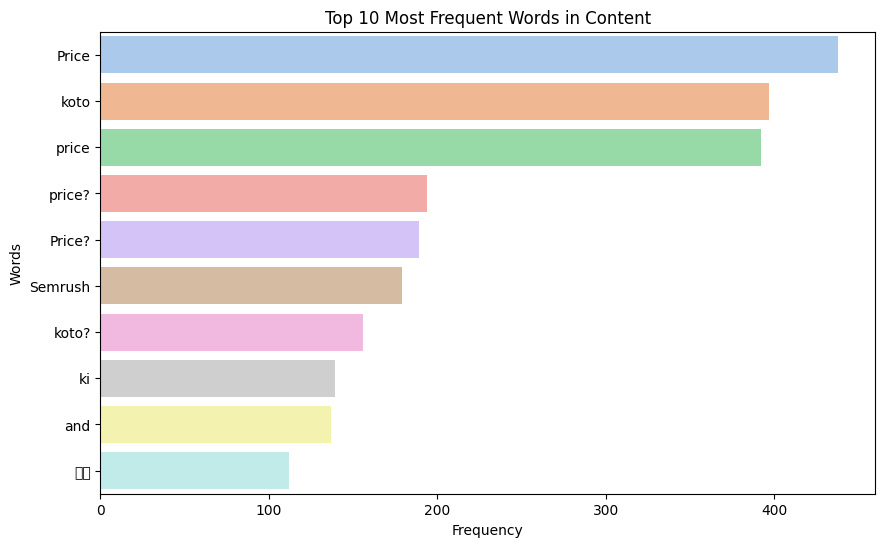

In [21]:
from collections import Counter

# Top words in Content
data['Content'] = data['Content'].fillna('').astype(str) # Fill NaN values with empty string and convert to string
words = Counter(" ".join(data['Content']).split())
top_words = pd.DataFrame(words.most_common(10), columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_words, palette="pastel")
plt.title('Top 10 Most Frequent Words in Content')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [22]:
# টাইমস্ট্যাম্পে রূপান্তর করা (errors='coerce' ব্যবহার করলে ইনভ্যালিড এন্ট্রি NaT হবে)
comment['CommentAt'] = pd.to_datetime(comment['CommentAt'], errors='coerce')

# NaT ভ্যালু ড্রপ করা
comment = comment.dropna(subset=['CommentAt'])

# Feature extraction
comment['Year'] = comment['CommentAt'].dt.year
comment['Month'] = comment['CommentAt'].dt.month
comment['Day'] = comment['CommentAt'].dt.day
comment['DayName'] = comment['CommentAt'].dt.day_name()
comment['Hour'] = comment['CommentAt'].dt.hour
comment['Minute'] = comment['CommentAt'].dt.minute
comment['Second'] = comment['CommentAt'].dt.second
comment['AM_PM'] = comment['CommentAt'].dt.strftime('%p')

# Display the DataFrame with features
comment.head()

<ipython-input-22-cd82f585bf70>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  comment['CommentAt'] = pd.to_datetime(comment['CommentAt'], errors='coerce')
<ipython-input-22-cd82f585bf70>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment['Year'] = comment['CommentAt'].dt.year
<ipython-input-22-cd82f585bf70>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comme

,Author,Content,SubCommentsCount,CommentAt,Year,Month,Day,DayName,Hour,Minute,Second,AM_PM
0,Md Minhajul Islam,কত,1.0,2024-06-05 14:52:02,2024,6,5,Wednesday,14,52,2,PM
1,Kazi Siratul Mostakim,Brilliant learning app share price?,0.0,2024-06-06 19:39:45,2024,6,6,Thursday,19,39,45,PM
2,Nehal Anas,Lightroom premium price?,1.0,2024-06-09 18:40:53,2024,6,9,Sunday,18,40,53,PM
3,Rahmot Hossain Niaz,vi envato elements price koto?,1.0,2024-06-10 09:53:42,2024,6,10,Monday,9,53,42,AM
4,Rehdoy Hasan,wellsaid labs Ai Voice lab,2.0,2024-06-10 10:03:43,2024,6,10,Monday,10,3,43,AM


<Axes: xlabel='AM_PM'>

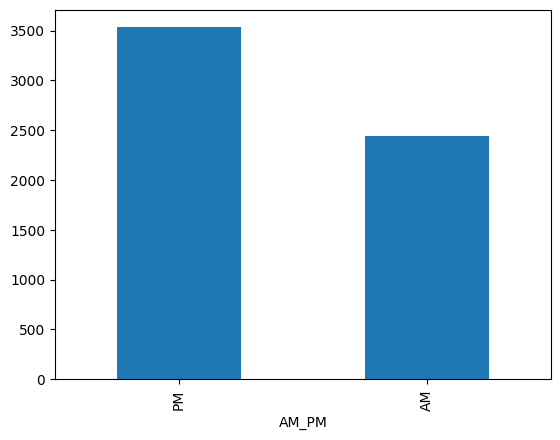

In [23]:
comment["AM_PM"].value_counts().plot(kind="bar")

<Axes: xlabel='DayName'>

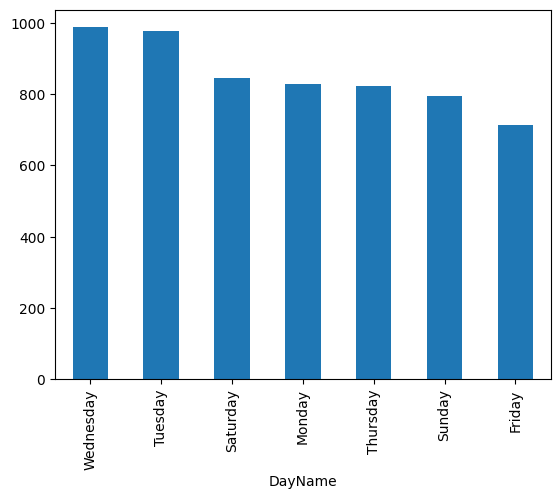

In [24]:
comment["DayName"].value_counts().plot(kind="bar")

In [25]:
comment['Content'] = comment['Content'].str.lower()
price_keywords = ['price', 'দাম', 'মূল্য']
price_comments = comment[comment['Content'].str.contains('|'.join(price_keywords), na=False)]
total_comments = len(comment)
price_comments_count = len(price_comments)
price_comments_percentage = (price_comments_count / total_comments) * 100
price_comments_count, total_comments, price_comments_percentage


(1848, 5971, 30.94958968347011)

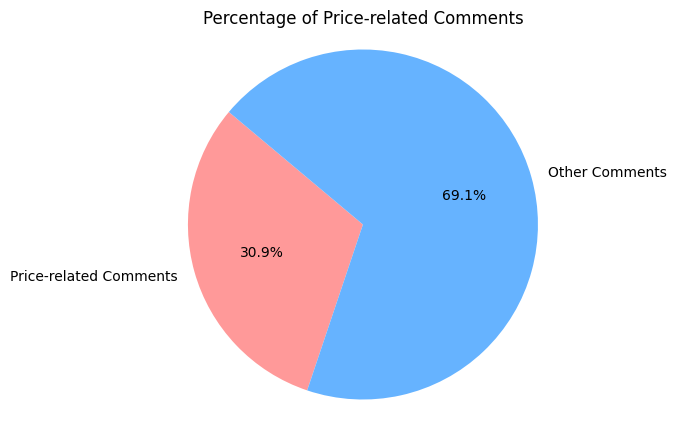

In [26]:
# মোট কমেন্ট এবং মূল্য সম্পর্কিত কমেন্টের সংখ্যা
price_comments_count = len(price_comments)
total_comments = len(comment)
price_comments_percentage = (price_comments_count / total_comments) * 100

# প্লট তৈরি
labels = ['Price-related Comments', 'Other Comments']
counts = [price_comments_count, total_comments - price_comments_count]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 5))

# পাই চার্ট
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Price-related Comments')
plt.axis('equal')  # সমান বৃত্তাকার রাখতে
plt.show()


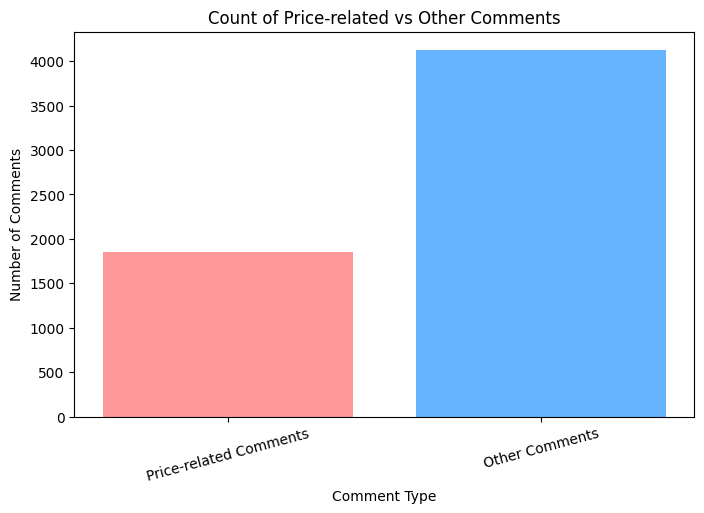

In [27]:
# বার চার্ট তৈরি
categories = ['Price-related Comments', 'Other Comments']
counts = [price_comments_count, total_comments - price_comments_count]

plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color=['#ff9999', '#66b3ff'])
plt.title('Count of Price-related vs Other Comments')
plt.xlabel('Comment Type')
plt.ylabel('Number of Comments')
plt.xticks(rotation=15)
plt.show()


In [28]:
# Define a list of common digital tools/products based on context
tools_keywords = [
    'lightroom', 'photoshop', 'illustrator', 'envato', 'canva', 'wellsaid labs',
    'udemy', 'coursera', 'envato elements', 'adobe', 'ai voice', 'premium', 'pro','semrush','canva pro'
]
comment['Tools_Mentioned'] = comment['Content'].apply(lambda x: [tool for tool in tools_keywords if tool in x])
tools_mentions = comment.explode('Tools_Mentioned')['Tools_Mentioned'].value_counts()
tools_mentions_dict = tools_mentions.to_dict()
tools_mentions_dict


{'semrush': 467,
 'pro': 200,
 'canva': 113,
 'envato': 80,
 'premium': 76,
 'canva pro': 55,
 'adobe': 44,
 'coursera': 33,
 'udemy': 29,
 'envato elements': 18,
 'photoshop': 9,
 'illustrator': 3,
 'ai voice': 1,
 'lightroom': 1,
 'wellsaid labs': 1}

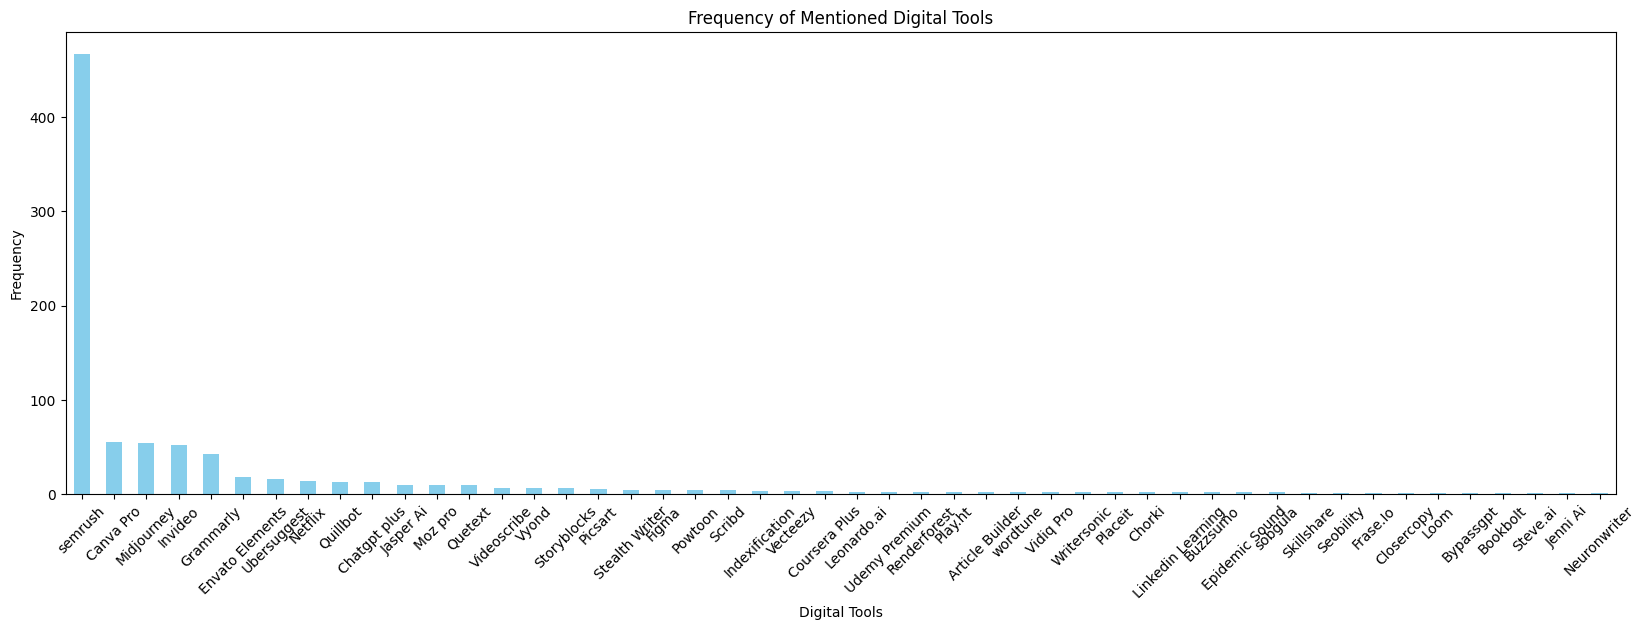

In [29]:
# # Define the list of tools/products
# tools_keywords = [
#     'lightroom', 'photoshop', 'illustrator', 'envato', 'canva', 'wellsaid labs',
#     'udemy', 'coursera', 'envato elements', 'adobe', 'ai voice', 'premium', 'pro','semrush','canva pro'
# ]




tools_keywords = [
    "Sermush Unlimited", "Ubersuggest", "Moz pro", "Grammarly", "Chatgpt plus",
    "Sincodeai", "Leonardo.ai", "Midjourney", "Bypassgpt", "Stealth Writer",
    "Writehuman.ai", "Originality Ai", "Frase.Io", "Neuronwriter", "Answerthepublic",
    "Labrika", "wordtune", "Revoicer", "Imgupscaler", "Screpy", "Mangools",
    "Seocrawl", "Linguix", "Nichesss", "Closercopy", "Copymatics", "Ocoya ai",
    "Writerzen", "Renderforest", "Placeit", "Powtoon", "Vyond", "Helium10", "Flaticon",
    "Freepik Premium", "Canva Pro", "Vecteezy", "Icons8", "Similarweb", "Tome App",
    "Uizard.io", "Airbrush", "Pngtree", "Ai Video Creator", "Flexclip", "Sketch Geniusapp",
    "Steve.ai", "Creative Fabrica", "Spamzilla", "Udemy Premium", "Linkedin Learning",
    "Coursera Plus", "Masterclass", "Codeacademy", "Skillshare", "Scribd", "Epidemic Sound",
    "Keyword Revelar", "Pixlr", "Piktochart", "Ispionage", "Article Forge", "Niche Scrapper",
    "Primevideo", "Netflix", "Seobility", "Seositecheckup", "Seoptimer", "Seoscout", "Storybase",
    "Bookbolt", "Merchinformer", "Viral Launch", "Sellthetrend", "Prettymerch", "Zonguru",
    "Smartscout", "Whatsmyserp", "Salesamurai.io", "Tube Ranker", "Creaitor.ai", "Turnitin (Plagiarism)",
    "Craftly Ai", "Jenni Ai", "Localio.ai", "Rytr.me", "Copy Ai", "Jasper Ai", "Quillbot",
    "Quetext", "Keywordtool.io", "Spyfu", "Buzzsumo", "Deepl Pro", "Article Builder", "Hashtagsforlikes",
    "Woorank", "Indexification", "Junglescout", "Buzzstream", "Picmonkey", "Fotojet", "Vista",
    "Writersonic", "Serpstat", "Unbounce", "Designbeast", "Picsart", "Ai Image", "Snackeet",
    "Dream.ai", "Grothbarseo", "Designs.ai", "Doodly", "Toonly", "Toons.ai", "Invideo", "Vidiq Pro",
    "Lovo.ai", "Topicmojo", "Play.ht", "Videoscribe", "Robinize Ai", "Peppercontent.io", "Crazyegg",
    "Brand Overflow", "B2b Leadgen", "Hoichoi.tv", "Chorki", "Ipvanish Premium", "Storyblocks",
    "Envato Elements", "Motion Arry", "Wordhero", "Katteb ai", "Writeseed", "Writecream",
    "Plugintheme.net", "Gplrock", "Lovepik", "Pikbest", "Backlink Repository", "Spinrewriter",
    "Iconscout", "Lumen5", "Nando.ai", "Ai Seo", "Word.ai", "Adspy", "500px Downloader",
    "Alamy Downloader", "Eyeem Downloader", "Favepng Downloader", "Artlist Downloader",
    "Shutterstock Downloader", "Ai Image Generator", "Istock Downloader", "Ninja Seo Tools",
    "Ninja Web Tools", "Domain Search Tools", "Storyblocks Downloader", "Adobe Downloader",
    "Ecomhunt", "Spoke.app", "Smodin_io", "Creatopy", "Hellowscribe", "Rezi.Ai", "Prezi.Ai",
    "Figma", "Visme", "Scite ai", "GPTZero", "1of10.com", "Podcastle.ai", "Loom", "Prowritingaid",
    "Perplexity.ai", "Gnuelements", "lex.page", "123rf", "Cramly", "Writefull", "Fomoclips",
    "Chatpdf", "Vidtoons", "Smodin io", "sobgula","semrush"
]


# Identify mentions of tools in each comment
comment['Tools_Mentioned'] = comment['Content'].apply(
    lambda x: [tool for tool in tools_keywords if tool.lower() in x.lower()]
)

# Count mentions of each tool
tools_mentions = comment.explode('Tools_Mentioned')['Tools_Mentioned'].value_counts()
tools_mentions_dict = tools_mentions.to_dict()

# Plotting
plt.figure(figsize=(20, 6))
tools_mentions.plot(kind='bar', color='skyblue')
plt.title('Frequency of Mentioned Digital Tools')
plt.xlabel('Digital Tools')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [30]:
list_data = []
for data in comment['Content']:
    list_data.append(data)

list_data

['কত',
 'brilliant  learning app share price?',
 'lightroom premium price?',
 'vi envato elements price koto?',
 'wellsaid labs ai voice lab',
 'need midjurney',
 'invido ai?',
 'grammarly price?',
 'canva lifetime কত টাকা?',
 'ভিপিএন গুলো প্রিমিয়াম কত দিনের?',
 'cyberghost vpn sell koren?',
 'scribd?',
 'skillshare er price plz',
 'trial ase ki?',
 'creative could koto',
 'scribd',
 'chatgpt available?',
 'litcharts available?',
 'renderforest ase ki',
 'coursera price?',
 'spotify and chatgpt plus price please.',
 'coursera price?',
 'semrush tool acee?',
 'chatgpt & udemy premium koto?',
 'এই সফটওয়্যার গা কি হবে??\n\nhttps://scontent.fdac134-1.fna.fbcdn.net/v/t39.30808-6/450095356_1438945267505239_9112628533560275368_n.jpg?_nc_cat=109&ccb=1-7&_nc_sid=bd9a62&_nc_eui2=aefyux2hew6szgndtw6kxksrvl4e6oqrd3xwxgtqhct3fapmypiynatg3feaaygs33iubwnbuyssyuzvyvsuy0lh&_nc_ohc=w65derd575kq7knvghxnuh-&_nc_zt=23&_nc_ht=scontent.fdac134-1.fna&_nc_gid=agpzkcsm2e_lsbjfkw1poap&oh=00_ayb04mroex0dgk1n64tc2

In [46]:
import re
import pandas as pd

# Function to clean text
def clean_text(text):
    # Step 1: Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags
                               u"\U00002500-\U00002BEF"  # Chinese char
                               u"\U00002702-\U000027B0"
                               u"\U0001F926-\U0001F937"
                               u"\U00010000-\U0010FFFF"  # Supplementary characters
                               u"\u200d"                # Zero width joiner
                               u"\u2640-\u2642"         # Female and male symbols
                               u"\u2B50-\u2B55"         # Stars
                               "]+", flags=re.UNICODE)

    text = emoji_pattern.sub(r'', text)  # Remove emojis

    # Step 2: Remove links (URLs)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Step 3: Remove special characters (keep letters, numbers, spaces)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # Step 4: Remove extra spaces
    cleaned_text = ' '.join(text.split())

    return cleaned_text

# Apply the clean_text function to 'Content' column
comment_data['Content'] = comment_data['Content'].apply(clean_text)

# Display the cleaned DataFrame
print(comment_data)


                       Author                             Content  \
0           Md Minhajul Islam                                       
1       Kazi Siratul Mostakim  Brilliant learning app share price   
2                  Nehal Anas             Lightroom premium price   
3         Rahmot Hossain Niaz       vi envato elements price koto   
4                Rehdoy Hasan          wellsaid labs Ai Voice lab   
...                       ...                                 ...   
9620  Abu Syed Mohammed Mujib                           Apps Apps   
9621      Mahadi Ahesan Niloy             I got these under 500Tk   
9622        Md. Waliul Hasnat   Sobguly lagbe na 34 ta deoua jabe   
9623                 Arafat A                          NEED kittl   
9632     Faisaliteb SEO Tools                                       

      SubCommentsCount           CommentAt  DayOfWeek  Hour  WordCount  \
0                  1.0 2024-06-05 14:52:02  Wednesday  14.0          1   
1                  0.0 

In [47]:

list_dataw = []
for data in comment['Content']:
    list_dataw.append(data)

list_dataw

['কত',
 'brilliant  learning app share price?',
 'lightroom premium price?',
 'vi envato elements price koto?',
 'wellsaid labs ai voice lab',
 'need midjurney',
 'invido ai?',
 'grammarly price?',
 'canva lifetime কত টাকা?',
 'ভিপিএন গুলো প্রিমিয়াম কত দিনের?',
 'cyberghost vpn sell koren?',
 'scribd?',
 'skillshare er price plz',
 'trial ase ki?',
 'creative could koto',
 'scribd',
 'chatgpt available?',
 'litcharts available?',
 'renderforest ase ki',
 'coursera price?',
 'spotify and chatgpt plus price please.',
 'coursera price?',
 'semrush tool acee?',
 'chatgpt & udemy premium koto?',
 'এই সফটওয়্যার গা কি হবে??\n\nhttps://scontent.fdac134-1.fna.fbcdn.net/v/t39.30808-6/450095356_1438945267505239_9112628533560275368_n.jpg?_nc_cat=109&ccb=1-7&_nc_sid=bd9a62&_nc_eui2=aefyux2hew6szgndtw6kxksrvl4e6oqrd3xwxgtqhct3fapmypiynatg3feaaygs33iubwnbuyssyuzvyvsuy0lh&_nc_ohc=w65derd575kq7knvghxnuh-&_nc_zt=23&_nc_ht=scontent.fdac134-1.fna&_nc_gid=agpzkcsm2e_lsbjfkw1poap&oh=00_ayb04mroex0dgk1n64tc2

In [50]:
import re
from collections import Counter



# Regular expression to extract tools and software names (customize as needed)
pattern = r'\b[A-Z][a-zA-Z0-9\+]+\b'

# Extract all matches
all_tools = []
for comment in comment_data['Content']:
    matches = re.findall(pattern, comment)
    all_tools.extend(matches)

# Count the occurrences
tool_counts = Counter(all_tools)

# Display results
print("Tool/Software Usage Count:")
for tool, count in tool_counts.most_common():
    print(f"{tool}: {count}")


Tool/Software Usage Count:
Price: 653
Semrush: 199
Koto: 62
Chatgpt: 56
Ahrefs: 54
Canva: 49
Envato: 41
Chat: 36
Leonardo: 36
Vai: 35
Ahref: 34
Service: 34
Midjourney: 33
Details: 33
Mid: 33
Only: 32
Ami: 32
How: 31
Pp: 31
Interested: 31
Tools: 30
Ahrefsgroupbuy: 30
SEO: 29
Adobe: 28
Best: 28
Need: 25
SEMRUSH: 25
Pro: 24
Invideo: 23
Vidiq: 23
Ai: 22
Grammarly: 22
ChatGPT: 21
Coursera: 20
Good: 20
Jasper: 20
AI: 19
Please: 19
Freepik: 17
Thanks: 17
SEMrush: 16
Udemy: 15
Hix: 14
Premium: 14
Hobe: 14
Inbox: 14
Very: 14
Turnitin: 13
Amar: 13
Great: 13
Faisaliteb: 13
GPT: 12
Buy: 12
Google: 12
Nice: 11
Monthly: 10
Prices: 10
Dam: 10
Windows: 10
Bhai: 9
Lifetime: 9
Do: 9
Moz: 9
Trusted: 9
Unlimited: 9
Ubersuggest: 9
Package: 9
Link: 9
CANVA: 9
VidIQ: 8
Available: 8
In: 8
Youtube: 8
Hello: 8
Prize: 8
Apnader: 8
Sem: 8
Highly: 8
PRO: 8
LinkedIn: 7
Express: 7
IDM: 7
Is: 7
Facebook: 7
Nord: 7
Daily: 7
Gpt: 7
Pictory: 7
Hi: 7
Grammerly: 7
Recraft: 7
Life: 7
Im: 7
Seo: 7
Thank: 7
Muhammad: 7
Offic

In [49]:
comment_data.head()

,Author,Content,SubCommentsCount,CommentAt,DayOfWeek,Hour,WordCount,Cleaned_Content
0,Md Minhajul Islam,,1.0,2024-06-05 14:52:02,Wednesday,14.0,1,
1,Kazi Siratul Mostakim,Brilliant learning app share price,0.0,2024-06-06 19:39:45,Thursday,19.0,5,Brilliant learning app share price
2,Nehal Anas,Lightroom premium price,1.0,2024-06-09 18:40:53,Sunday,18.0,3,Lightroom premium price
3,Rahmot Hossain Niaz,vi envato elements price koto,1.0,2024-06-10 09:53:42,Monday,9.0,5,vi envato elements price koto
4,Rehdoy Hasan,wellsaid labs Ai Voice lab,2.0,2024-06-10 10:03:43,Monday,10.0,5,wellsaid labs Ai Voice lab


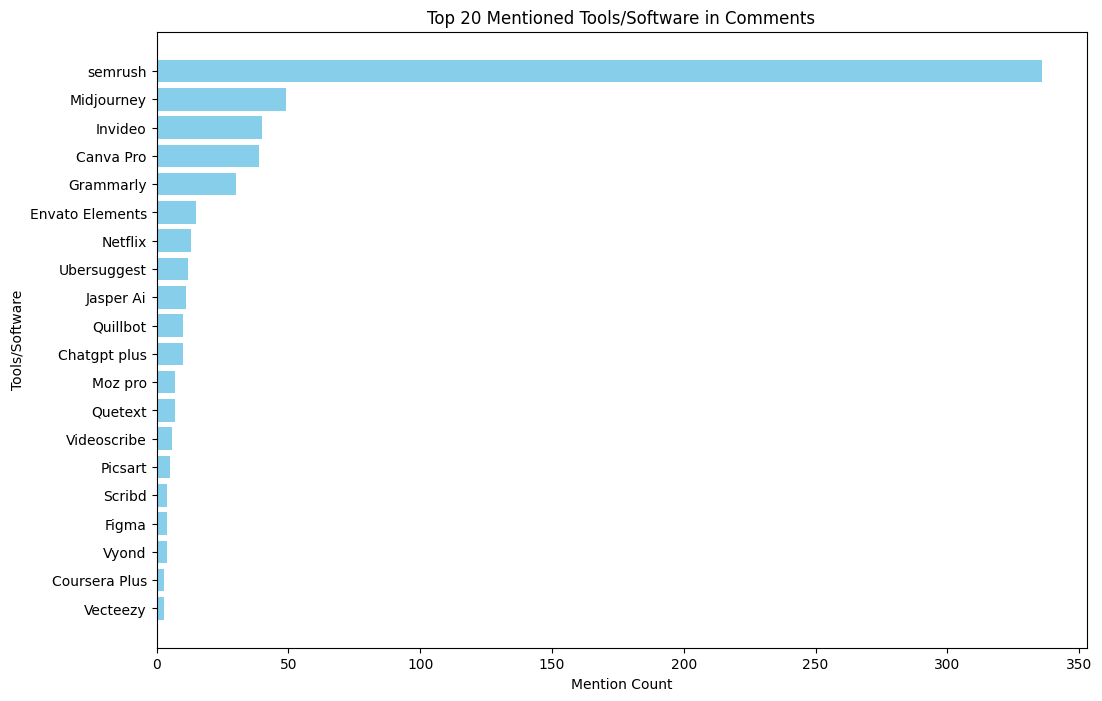

,Tool,Count
6,semrush,336
12,Midjourney,49
13,Invideo,40
9,Canva Pro,39
1,Grammarly,30
0,Envato Elements,15
18,Netflix,13
29,Ubersuggest,12
27,Jasper Ai,11
11,Quillbot,10


In [51]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# List of tools/software names provided by the user
tools_list = [
    "Sermush Unlimited", "Ubersuggest", "Moz pro", "Grammarly", "Chatgpt plus",
    "Sincodeai", "Leonardo.ai", "Midjourney", "Bypassgpt", "Stealth Writer",
    "Writehuman.ai", "Originality Ai", "Frase.Io", "Neuronwriter", "Answerthepublic",
    "Labrika", "wordtune", "Revoicer", "Imgupscaler", "Screpy", "Mangools",
    "Seocrawl", "Linguix", "Nichesss", "Closercopy", "Copymatics", "Ocoya ai",
    "Writerzen", "Renderforest", "Placeit", "Powtoon", "Vyond", "Helium10", "Flaticon",
    "Freepik Premium", "Canva Pro", "Vecteezy", "Icons8", "Similarweb", "Tome App",
    "Uizard.io", "Airbrush", "Pngtree", "Ai Video Creator", "Flexclip", "Sketch Geniusapp",
    "Steve.ai", "Creative Fabrica", "Spamzilla", "Udemy Premium", "Linkedin Learning",
    "Coursera Plus", "Masterclass", "Codeacademy", "Skillshare", "Scribd", "Epidemic Sound",
    "Keyword Revelar", "Pixlr", "Piktochart", "Ispionage", "Article Forge", "Niche Scrapper",
    "Primevideo", "Netflix", "Seobility", "Seositecheckup", "Seoptimer", "Seoscout", "Storybase",
    "Bookbolt", "Merchinformer", "Viral Launch", "Sellthetrend", "Prettymerch", "Zonguru",
    "Smartscout", "Whatsmyserp", "Salesamurai.io", "Tube Ranker", "Creaitor.ai", "Turnitin (Plagiarism)",
    "Craftly Ai", "Jenni Ai", "Localio.ai", "Rytr.me", "Copy Ai", "Jasper Ai", "Quillbot",
    "Quetext", "Keywordtool.io", "Spyfu", "Buzzsumo", "Deepl Pro", "Article Builder", "Hashtagsforlikes",
    "Woorank", "Indexification", "Junglescout", "Buzzstream", "Picmonkey", "Fotojet", "Vista",
    "Writersonic", "Serpstat", "Unbounce", "Designbeast", "Picsart", "Ai Image", "Snackeet",
    "Dream.ai", "Grothbarseo", "Designs.ai", "Doodly", "Toonly", "Toons.ai", "Invideo", "Vidiq Pro",
    "Lovo.ai", "Topicmojo", "Play.ht", "Videoscribe", "Robinize Ai", "Peppercontent.io", "Crazyegg",
    "Brand Overflow", "B2b Leadgen", "Hoichoi.tv", "Chorki", "Ipvanish Premium", "Storyblocks",
    "Envato Elements", "Motion Arry", "Wordhero", "Katteb ai", "Writeseed", "Writecream",
    "Plugintheme.net", "Gplrock", "Lovepik", "Pikbest", "Backlink Repository", "Spinrewriter",
    "Iconscout", "Lumen5", "Nando.ai", "Ai Seo", "Word.ai", "Adspy", "500px Downloader",
    "Alamy Downloader", "Eyeem Downloader", "Favepng Downloader", "Artlist Downloader",
    "Shutterstock Downloader", "Ai Image Generator", "Istock Downloader", "Ninja Seo Tools",
    "Ninja Web Tools", "Domain Search Tools", "Storyblocks Downloader", "Adobe Downloader",
    "Ecomhunt", "Spoke.app", "Smodin_io", "Creatopy", "Hellowscribe", "Rezi.Ai", "Prezi.Ai",
    "Figma", "Visme", "Scite ai", "GPTZero", "1of10.com", "Podcastle.ai", "Loom", "Prowritingaid",
    "Perplexity.ai", "Gnuelements", "lex.page", "123rf", "Cramly", "Writefull", "Fomoclips",
    "Chatpdf", "Vidtoons", "Smodin io", "sobgula", "semrush"
]

# Convert the tools list to a set for efficient matching
tools_set = set(tools_list)

# Extract relevant comments content
comments_content = comment_data['Content'].astype(str).str.lower()

# Count occurrences of tools/software in the comments
tool_count = Counter()
for comment in comments_content:
    for tool in tools_set:
        if tool.lower() in comment:
            tool_count[tool] += 1

# Convert counts to a DataFrame for plotting
tool_count_df = pd.DataFrame(tool_count.items(), columns=['Tool', 'Count']).sort_values(by='Count', ascending=False)

# Plot the top 20 most mentioned tools
top_tools = tool_count_df.head(20)
plt.figure(figsize=(12, 8))
plt.barh(top_tools['Tool'], top_tools['Count'], color='skyblue')
plt.xlabel('Mention Count')
plt.ylabel('Tools/Software')
plt.title('Top 20 Mentioned Tools/Software in Comments')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()

# Output the top tools for further inspection
tool_count_df.head(20)


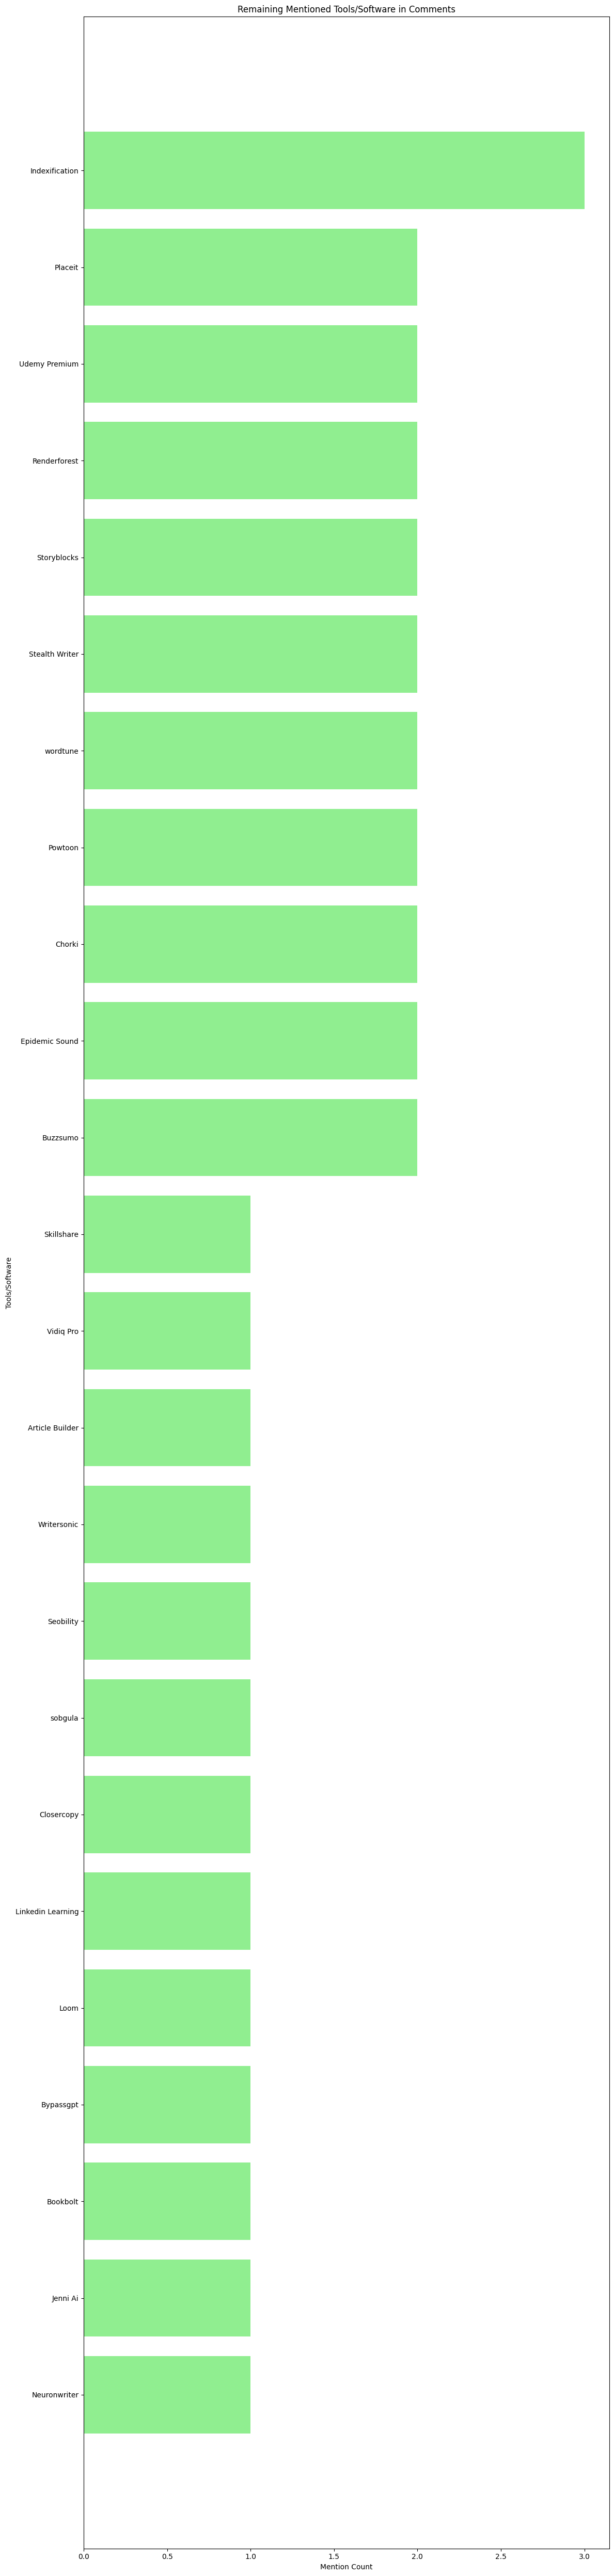

[{'Tool': 'Indexification', 'Count': 3},
 {'Tool': 'Placeit', 'Count': 2},
 {'Tool': 'Udemy Premium', 'Count': 2},
 {'Tool': 'Renderforest', 'Count': 2},
 {'Tool': 'Storyblocks', 'Count': 2},
 {'Tool': 'Stealth Writer', 'Count': 2},
 {'Tool': 'wordtune', 'Count': 2},
 {'Tool': 'Powtoon', 'Count': 2},
 {'Tool': 'Chorki', 'Count': 2},
 {'Tool': 'Epidemic Sound', 'Count': 2},
 {'Tool': 'Buzzsumo', 'Count': 2},
 {'Tool': 'Skillshare', 'Count': 1},
 {'Tool': 'Vidiq Pro', 'Count': 1},
 {'Tool': 'Article Builder', 'Count': 1},
 {'Tool': 'Writersonic', 'Count': 1},
 {'Tool': 'Seobility', 'Count': 1},
 {'Tool': 'sobgula', 'Count': 1},
 {'Tool': 'Closercopy', 'Count': 1},
 {'Tool': 'Linkedin Learning', 'Count': 1},
 {'Tool': 'Loom', 'Count': 1},
 {'Tool': 'Bypassgpt', 'Count': 1},
 {'Tool': 'Bookbolt', 'Count': 1},
 {'Tool': 'Jenni Ai', 'Count': 1},
 {'Tool': 'Neuronwriter', 'Count': 1}]

In [52]:
# Plot the remaining tools not included in the top 20
remaining_tools = tool_count_df.iloc[20:]

# Plotting all remaining tools as a bar chart
plt.figure(figsize=(12, 50))  # Adjust height for large datasets
plt.barh(remaining_tools['Tool'], remaining_tools['Count'], color='lightgreen')
plt.xlabel('Mention Count')
plt.ylabel('Tools/Software')
plt.title('Remaining Mentioned Tools/Software in Comments')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.tight_layout()
plt.show()

# Output remaining tools as a Python list
remaining_tools_list = remaining_tools.to_dict(orient='records')
remaining_tools_list


AM_PM
PM    1146
AM     620
Name: count, dtype: int64


<ipython-input-33-b96334b7f40f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_comments['AM_PM'] = price_comments['CommentAt'].dt.strftime('%p')


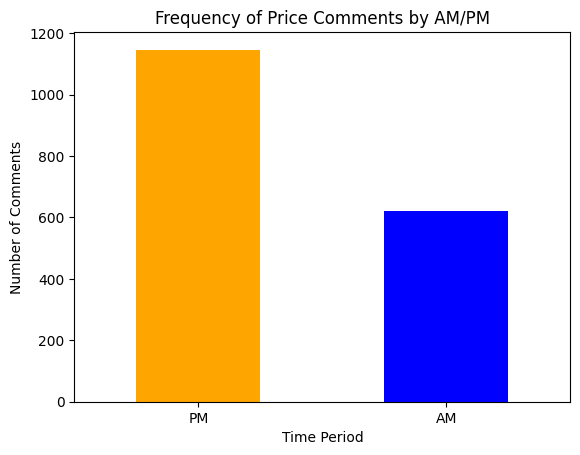

In [33]:
# Ensure 'CommentAt' is in datetime format
comment['CommentAt'] = pd.to_datetime(comment['CommentAt'])
price_comments = comment[comment['Content'].str.contains('price', case=False, na=False)]
price_comments['AM_PM'] = price_comments['CommentAt'].dt.strftime('%p')
am_pm_counts = price_comments['AM_PM'].value_counts()
print(am_pm_counts)

am_pm_counts.plot(kind='bar', color=['orange', 'blue'])
plt.title('Frequency of Price Comments by AM/PM')
plt.xlabel('Time Period')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.show()


In [36]:
comment_data['Content'].value_counts().head()

,count
Content,
Price,256
Price?,176
price,53
price?,33
#Ahrefsgroupbuy,30
